# Import requ libraires 

In [37]:
import tensorflow as tf
import keras 
import numpy as np 
import matplotlib.pyplot as plt

In [38]:
# Check keras version 
keras.__version__

'2.4.3'

In [39]:
from google.colab  import drive 
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [40]:
pwd

'/content'

In [41]:
ls

drive/  sample_data/


# Preprocessing 

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Có 60000 ảnh dùng để train và valid, 10000 ảnh dùng để test
Mỗi ảnh có một kênh màu, kích thước 28x28

In thu 1 anh
----------------------


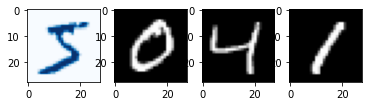

In [56]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

# rescale anh thanh anh thuc trong doan [0,1]
# y la label 
X_train,X_test = X_train/255.0,X_test/255.0
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
print("Có 60000 ảnh dùng để train và valid, 10000 ảnh dùng để test")
print("Mỗi ảnh có một kênh màu, kích thước 28x28")
print()
print ("In thu 1 anh")
print("----------------------")
plt.subplot( 1,4,1)
plt.imshow(X_train[0],cmap= 'Blues')
plt.subplot(1, 4,2)
plt.imshow(X_train[1],cmap = "gray" ) 
plt.subplot(1,4,3)
plt.imshow(X_train[2],cmap ='gray')
plt.subplot(1,4,4) 
plt.imshow(X_train[3],cmap = 'gray')
plt.show( ) 

#Tách một phần tập train thành tập valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1) # Tách theo tỉ lệ validation/train=1/9

# Buidling CNN model 

In [52]:
 print("Define the input  for image ")
 inputs = keras.layers.Input(shape = (28,28))
 print("Kích thước input: {}, None tượng trưng cho số lượng ảnh một batch không xác định trước".format(inputs.shape))
print("Reshape the input") 
inputs_reshape = keras.layers.Reshape((28,28,1))(inputs) 
print(" Reshape : {}". format(inputs_reshape.shape))

### add Conv2D in keras 
## pare 
conv = keras.layers.Convolution2D(filters = 20, kernel_size = [5,5], strides = [1,1], padding = 'same',activation = tf.nn.relu)  (inputs_reshape) 
print("Kích thước conv: {}, chiều cuối cùng chính là số filter".format(conv.shape))

### add Maxpooling 
## there are no learnable training parameters in this class 
maxpool = keras.layers.MaxPool2D(pool_size = [ 2,2], strides =     [2,2])(conv) 

print("kich thuoc sau maxpool : {} " .format(maxpool.shape) )  
### cov layer 
conv_1  = keras.layers.Convolution2D(filters = 20, kernel_size = [5,5] , strides = [1,1],activation = tf.nn.relu)(maxpool)
print("Convolutional size ", conv_1.shape)
## maxpool layer 
maxpool_1 = keras.layers.MaxPooling2D(pool_size = [2,2], strides = [2,2] ) (conv_1)
print("size after maxpooling 2*2", maxpool_1.shape)
### Fatten lop conv 
flatten = keras.layers.Flatten()(maxpool_1) 
print("kich thuoc flatten  : {}".format(flatten.shape)) 
## fully connected 
softmax = keras.layers.Dense(units = 20,activation = 'softmax')(flatten)
softmax_1 = keras.layers.Dense(units = 10, activation = 'softmax' )(softmax)

# model 
model = keras.models.Model(inputs = inputs, outputs = softmax_1)

model.compile(optimizer = 'adam',loss = tf.keras.losses.sparse_categorical_crossentropy, metrics  = ["accuracy"])
   
### display the model achitecture 
print("Model Achitecture") 
model.summary()

#model = keras.layers.Dense(units  = 10, 


Define the input  for image 
Kích thước input: (None, 28, 28), None tượng trưng cho số lượng ảnh một batch không xác định trước
Reshape the input
 Reshape : (None, 28, 28, 1)
Kích thước conv: (None, 28, 28, 20), chiều cuối cùng chính là số filter
kich thuoc sau maxpool : (None, 14, 14, 20) 
Convolutional size  (None, 10, 10, 20)
size after maxpooling 2*2 (None, 5, 5, 20)
kich thuoc flatten  : (None, 500)
Model Achitecture
Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
reshape_27 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_32 (MaxPoo

## Training 

In [59]:
history = model.fit(X_train,y_train, epochs = 10, batch_size = 100, validation_data  =(X_valid, y_valid) )

model.save_weights("first_model.h5")

# load model 

model.load_weights("first_model.h5")


### evaluate model in test 

test_loss,test_acc = model.evaluate(X_test,y_test)

print("Loss trên tập test: ", test_loss," Accuracy trên tập test: ", test_acc)

Epoch 1/10
540/540 [==============================] - 2s 3ms/step - loss: 0.0847 - accuracy: 0.9938 - val_loss: 0.1000 - val_accuracy: 0.9862
Epoch 2/10
540/540 [==============================] - 2s 3ms/step - loss: 0.0663 - accuracy: 0.9951 - val_loss: 0.0901 - val_accuracy: 0.9877
Epoch 3/10
540/540 [==============================] - 2s 3ms/step - loss: 0.0549 - accuracy: 0.9962 - val_loss: 0.0828 - val_accuracy: 0.9883
Epoch 4/10
540/540 [==============================] - 2s 3ms/step - loss: 0.0463 - accuracy: 0.9965 - val_loss: 0.0777 - val_accuracy: 0.9873
Epoch 5/10
540/540 [==============================] - 2s 3ms/step - loss: 0.0406 - accuracy: 0.9966 - val_loss: 0.0722 - val_accuracy: 0.9878
Epoch 6/10
540/540 [==============================] - 2s 3ms/step - loss: 0.0357 - accuracy: 0.9969 - val_loss: 0.0680 - val_accuracy: 0.9860
Epoch 7/10
540/540 [==============================] - 2s 3ms/step - loss: 0.0308 - accuracy: 0.9972 - val_loss: 0.0747 - val_accuracy: 0.9858
Epoch 

In [91]:
result = model.predict(X_test[0:1])

In [92]:
result

array([[2.1684153e-05, 1.7094778e-04, 1.5479307e-04, 3.2426638e-04,
        1.1345497e-04, 4.0738829e-05, 2.4705038e-05, 9.9883336e-01,
        4.9889084e-05, 2.6626233e-04]], dtype=float32)

In [83]:
import numpy as np 
final = np.argmax(result)

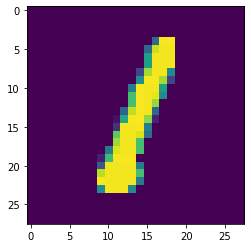

In [95]:
plt.imshow(X_train[100])

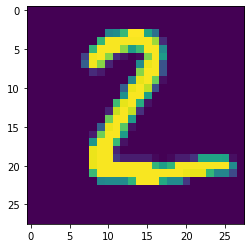

In [78]:
plt.imshow(X_test[1])

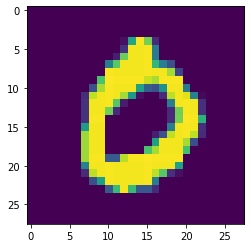

In [90]:
plt.imshow(X_test[3])